Automatically created module for IPython interactive environment


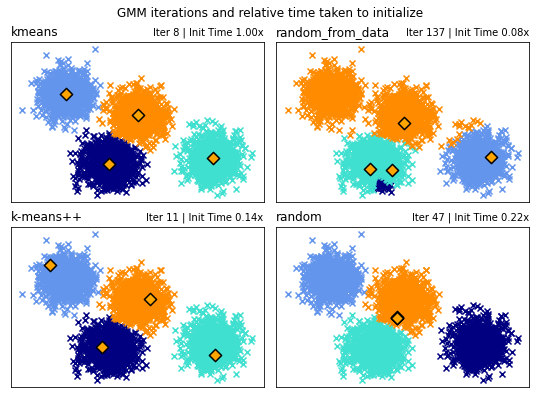

In [1]:
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets._samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms

print(__doc__)
# 데이터를 생성합니다.
X, y_true = make_blobs(n_samples=4000, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

n_samples = 4000
n_components = 4
x_squared_norms = row_norms(X, squared=True)


def get_initial_means(X, init_params, r):
    gmm = GaussianMixture(
        n_components=4, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_


methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]
times_init = {}
relative_times = {}

plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

# 방법에 따라 GMM을 훈련하고 플롯합니다.
for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    start = timer()
    # 초기 평균을 얻습니다.
    ini = get_initial_means(X, method, r)
    end = timer()
    init_time = end - start

    # GMM을 훈련합니다.
    gmm = GaussianMixture(
        n_components=4, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    times_init[method] = init_time

    # 각 클러스터에 대한 데이터 포인트를 플롯합니다.
    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(
        ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black"
    )
    # 상대 시간을 계산하고 제목에 표시합니다.
    relative_times[method] = times_init[method] / times_init[methods[0]]
    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i | Init Time %.2fx" % (gmm.n_iter_, relative_times[method]),
        loc="right",
        fontsize=10,
    )
# 전체 플롯에 제목을 추가하고 표시합니다.
plt.suptitle("GMM iterations and relative time taken to initialize")
plt.show()